# MTND--Maquina-de-Turing-Nao-Deterministica-
Algoritimo representação de uma Máquina de Turing Não Dterministica (MTND) da matéria de Teoria da COmputação do curso de Engenharia da Computação da UFRB 

### Discente: Adenilton Morais Arcanjo 


# Introdução 


A Máquina de Turing explicitada por Alan Mathison Turing, como um dispositivo lógico capaz de ler, escrever e apagar símbolos binários em uma fita de comprimento ilimitado e dividida por quadros de igual tamanho.  Uma cabeça de leitura/gravação se moveria em qualquer direção ao longo da fita, um quadrado por vez, e uma unidade de controle poderia interpretar uma lista de instruções simples, movendo‐se para a direita ou esquerda. Esse conceito de máquina teve uma importância fundamental no desenvolvimento de áreas de computabilidade, teoria dos autômatos formais e análise de algoritmos(Botelho, 2006).

EEste trabalho é pré-requisito como uma atividade avaliativa da matéria de Teoria da Computação do curso de Engenharia da Computação da UFRB. O trabalho consiste na implementação de um algoritimo que simule uma maquina de Turing Não Determinista.

# Especificação do trabalho 


## Descrição
Implemente um algoritmo que simule uma Máquina de Turing Não Determinista. A entrada
consiste da especificação de uma MTND e de um conjunto de palavras. A saída consiste de uma
lista indicando ‘S’ caso a MTND reconheça a palavra em questão e ‘N’ caso contrário.

## Obsservações:
1. Leitura e escrita na entrada/saída padrão.
2. Qualquer divergência na saída com relação ao formato especificado implicará em nota zero.
3. A implementação não pode fazer uso de recursão.
4. No código fonte, você deve documentar como você gerenciou o não determinismo.
5. Critério de reconhecimento: parada em estado final e inexistência de transição.

## Entrada
Na primeira linha, há uma lista de estados. Na segunda linha, há o alfabeto de entrada. Na terceira
linha, há o alfabeto da fita. Na quarta linha, há o símbolo especial que limita a fita à esquerda. Na
quinta linha, há o símbolo branco da fita. Na sexta linha, há o número total n de transições. Para
cada uma das n linhas seguintes, há uma quíntupla <a, b, c, d, e> onde ‘a’ é o estado de origem, ‘b’
é o caractere a ser lido, ‘c’ é o estado de destino, ‘d’ é o símbolo a ser escrito e, por fim, ‘e’ é a
direção, imóvel (I), esquerda (E) e direita (D). Em seguida, há um caractere informando o estado
inicial. Em seguida, há uma lista de estados finais. Por fim, há uma lista de palavras de teste a ser
reconhecida. Os itens da listas serão separados por espaço em branco. A palavra vazia é
representada por *.

## Saída
Seu programa deve imprimir para cada palavra de teste ‘S’ se a MTND reconhece a palavra ou ‘N’
caso contrário.

## Exemplo

![Image](entrada_saida.png)


# Implementação do código e testes

Para a implementação do código foi utilizada a linguagem Python. Inicialmente o algoritmo armazena os dados de entrada em uma forma de quíntupla <a, b, c, d, e>, onde ‘a’ é o estado de origem ‘b’ é o caractere a ser lido, ‘c’ é o estado de destino, ‘d’ é o símbolo a ser escrito e, por fim, ‘e’ é a direção, imóvel (I), esquerda (E) e direita (D).

Para que a MT saiba quais os possíveis estados ao qual podem ser feitas as transições, as informações foram colocados em um dicionário de trancisões, no qual a chave corresponde uma Tupla com (‘a’,’b’)  e os valores referentes a chave são <’c’,’d’ ,‘e’> que serão armazenados em uma lista. Para a implementação do código foi utilizada a linguagem Python e a IDE Visual Studio Code 


In [ ]:
import time
estados = input().split() 
alfabeto_entrada=input().split() 
alfabeto_fita = input().split()
limite_esquerda = input()  
simbolo_branco = input() 
numero_t=int(input()) 

transicoes=dict()

#armazenando os dados no dicionário 
for i in range(numero_t):
    quintupla = input().split() # quintupla que armazenará <a,b,c,d,e>
    chave = (quintupla[0], quintupla[1])

    if chave not in transicoes:
        transicoes[chave]=([[quintupla[2], quintupla[3], quintupla[4]]])
    else:
        transicoes[chave].append([quintupla[2], quintupla[3], quintupla[4]])
        
estado_inicial = input()
estados_finais = input().split()
palavras = input().split()

indice_inicial=1

Nessa parte do código é verificado se as palavras são aceitas pela MT, ao percorrer a palavra se a chave relacionada a configuração atual estiver no dicionário de transições, é adicionado a uma pilha as configurações do estado atual da máquina, com a fita e a posição do cabeçote alterados, ao armazenar as configurações na pilha, isso garante o não determinismo, no qual todas as possibilidades de caminho são verificadas por uma busca em profundidade, esse processo se repete até a pilha esvaziar ou até a maquina parar, caso ela pare em um estado final a palavra é aceita. 

In [ ]:
for palavra in palavras:

    #tempo_inicial = time.time()   

    fita=list((limite_esquerda+palavra+simbolo_branco))
    elemento_pilha=[(estado_inicial, indice_inicial, fita)]
    
    aceita=False
    
    while len(elemento_pilha)>0:

        p=elemento_pilha.pop()
        estado_atual=p[0]
        indice_p=p[1]
        fita_p=p[2][:]
        chave_p=(estado_atual,fita_p[indice_p]) 
               
                       

        if chave_p not in transicoes and estado_atual in estados_finais:
            aceita=True
            break

        
        if chave_p in transicoes:
            
            for a in transicoes[(chave_p)]:            
                
                estado_atual = a[0] 
                fita_p[indice_p] = a[1]
                direcao = a[2]                 
                                              
                if direcao == 'E':                   
                    elemento_pilha.append((estado_atual, indice_p-1, fita_p))                                   

                elif direcao == 'D':
                   
                    if (indice_p+1)==len(fita):
                        fita_p.append(simbolo_branco)
                    elemento_pilha.append((estado_atual, indice_p+1, fita_p))                  
                    

                elif direcao == 'I':
                    elemento_pilha.append((estado_atual, indice_p, fita_p))       
                       
    #tempo_final = time.time()     
    #tempo_total=tempo_final-tempo_inicial   
    
    if aceita:
        print("S")
        #print(tempo_total)
    else:
        print("N")
        #print(tempo_total)

# Testes 

Para a realização dos testes foram utilizadas arquivos de entradas de diferentes maquinas de turing, para a realização dos testes foi utilizado o Terminal powershel, através do comando Get-Content nome_do_arquivo_teste.in | python Nome_do_arquivo_programa.py

# Teste de Tempo de execução 

Para a realização do teste de tempo de execução foi utilizado o automato para {w pertece {a, b} | o número de a’s em w é igual ao de b’s}.

#### Automado : 
<p>
0 1 2 3 4<br/> 
a b<br/> 
a b x *<br/> 
< <br/> 
*<br/> 
14<br/> 
0 x 0 * D<br/> 
0 a 1 * D<br/> 
0 * 4 * E<br/> 
0 b 3 * D<br/> 
1 a 1 a D<br/> 
1 x 1 x D<br/> 
1 b 2 x E<br/> 
2 a 2 a E<br/> 
2 b 2 b E<br/> 
2 x 2 x E<br/> 
2 * 0 * D<br/> 
3 b 3 b D<br/> 
3 x 3 x D<br/> 
3 a 2 x E<br/> 
0<br/> 
4<br/> 
</p>   

O teste foi feito com palavras que são aceitas pela máquina, para a realização do teste foram utilizadas 300 palavras com tamanhos que iam acrescentando de 70 em 70, o que gerou palavras de tamanho até aproximadamente 2100 caracteres. Para calcular o tempo  de execução de cada palavra, foi importado a biblioteca time , através do import time, e utilizado a função time.time(),  onde foi armazenado o tempo_total através da diferença do tempo final e do tempo inicial. 
Para esse teste foi feito uma regressão linear simples, para a realização da regressão foi utilizado sklearn, entre outras bibliotecas


#Regressão Linear Simples 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys


In [2]:
dados = pd.read_csv('teste.csv')# carregando os arquivos com os dados relacionados 
#ao tamanho da palavra e o tempo de execução 

In [3]:
dados.head()# Imprimir os 5 primeiros dados do arquivo 

,X,Y
0,70,0.003510
1,140,0.000000
2,210,0.000000
3,280,0.025327
4,350,0.014959


In [11]:
# armazenando os dados em suas respectivas variavés 
# x corresponde ao tamanho da palavra 
# y o tempo de execução de cada palavra 
X = dados['X'].values  
Y = dados['Y'].values

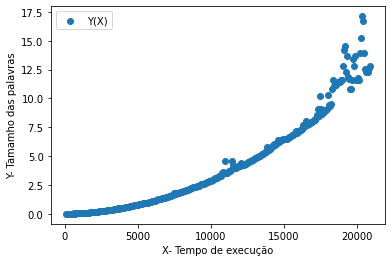

In [12]:
#imprimindo o grafico com os valores dos dados 
plt.scatter(X,Y,label='Y(X)');
plt.xlabel('X- Tempo de execução');
plt.ylabel('Y- Tamamho das palavras');
plt.legend();

Tipo da reta, onde m é o coeficiente angula e o c linear
![imagem da equeção da reta de regressão](attachment:image.png)

In [13]:
from sklearn.linear_model import LinearRegression 

modelo = LinearRegression()


In [14]:
X = X.reshape(-1, 1) #mudando o formato da para varias linhas e uma coluna 

In [15]:
modelo.fit(X,Y) #achar o melhor dos valores dos coeficientes

LinearRegression()

In [16]:
acuracia = modelo.score(X, Y) # saber o quão bem ajustou os pontos 

In [17]:
print("Acuracia = {:0.2f}".format(acuracia))

Acuracia = 0.90


In [21]:
coef_angular = modelo.coef_[0] #armazenando o coeficiente angular na memoria 

In [22]:
coef_linear = modelo.intercept_ #armazenando o coeficiente linear na memoria 

In [23]:
reta = coef_angular*X+coef_linear

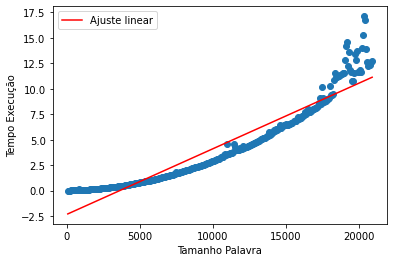

In [24]:
plt.scatter(X,Y,label='');
plt.plot(X,reta,label='Ajuste linear',color='red');
plt.xlabel('Tamanho Palavra');
plt.ylabel('Tempo Execução');
plt.legend();

com o resultado da regressão linear foi possivél observar que a medida que a palavara aumenta de tamanho o tempo de execução tambem aumenta, podendo haver pequenas variações, isso é devido a quantidade de transições que a maquina irá fazer dependendo do tamanho da palavra, quanto maior o tamanho da palavra, maior será o numeros de verificações.